In [49]:
# Advertising dataset
#to predict the person is purchasing or not with respect to age and estimated salary
#target = purchase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
plt.rcParams["figure.figsize"] = (15,5)

In [50]:
tan = pd.read_csv('Advertising_data.csv',low_memory = False)

In [51]:
X = tan.iloc[:, [2, 3]].values
y = tan.iloc[:, 4].values      


In [5]:
tan.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [6]:
tan.shape

(400, 5)

now we can check for null values 

In [7]:
tan.columns[tan.isnull().any()]

Index([], dtype='object')

now we can go for unique values

In [53]:
tan['User ID'].unique()

array([15624510, 15810944, 15668575, 15603246, 15804002, 15728773,
       15598044, 15694829, 15600575, 15727311, 15570769, 15606274,
       15746139, 15704987, 15628972, 15697686, 15733883, 15617482,
       15704583, 15621083, 15649487, 15736760, 15714658, 15599081,
       15705113, 15631159, 15792818, 15633531, 15744529, 15669656,
       15581198, 15729054, 15573452, 15776733, 15724858, 15713144,
       15690188, 15689425, 15671766, 15782806, 15764419, 15591915,
       15772798, 15792008, 15715541, 15639277, 15798850, 15776348,
       15727696, 15793813, 15694395, 15764195, 15744919, 15671655,
       15654901, 15649136, 15775562, 15807481, 15642885, 15789109,
       15814004, 15673619, 15595135, 15583681, 15605000, 15718071,
       15679760, 15654574, 15577178, 15595324, 15756932, 15726358,
       15595228, 15782530, 15592877, 15651983, 15746737, 15774179,
       15667265, 15655123, 15595917, 15668385, 15709476, 15711218,
       15798659, 15663939, 15694946, 15631912, 15768816, 15682

user id doesnt have any impact on predection so we can drop

In [9]:
tan.drop(columns=['User ID'], inplace=True)

In [10]:
tan['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
tan['Age'].unique()

array([19., 35., 26., 27., 32., 25., 20., 18., 29., 47., 45., 46., 48.,
       49., 31., 21., 28., 33., 30., 23., 24., 22., 59., 34., 39., 38.,
       37., 42., 40., 36., 41., 58., 55., 52., 60., 56., 53., 50., 51.,
       57., 44., 43., 54.])

In [12]:
tan['EstimatedSalary'].unique()

array([ 19000.,  20000.,  43000.,  57000.,  76000.,  58000.,  84000.,
       150000.,  33000.,  65000.,  80000.,  52000.,  86000.,  18000.,
        82000.,  25000.,  26000.,  28000.,  29000.,  22000.,  49000.,
        41000.,  23000.,  30000.,  74000., 137000.,  16000.,  44000.,
        90000.,  27000.,  72000.,  31000.,  17000.,  51000., 108000.,
        15000.,  79000.,  54000., 135000.,  89000.,  32000.,  83000.,
        55000.,  48000., 117000.,  87000.,  66000., 120000.,  63000.,
        68000., 113000., 112000.,  42000.,  88000.,  62000., 118000.,
        85000.,  81000.,  50000., 116000., 123000.,  73000.,  37000.,
        59000., 149000.,  21000.,  35000.,  71000.,  61000.,  75000.,
        53000., 107000.,  96000.,  45000.,  47000., 100000.,  38000.,
        69000., 148000., 115000.,  34000.,  60000.,  70000.,  36000.,
        39000., 134000., 101000., 130000., 114000., 142000.,  78000.,
       143000.,  91000., 144000., 102000., 126000., 133000., 147000.,
       104000., 1460

In [13]:
tan['Purchased'].unique()

array([0, 1], dtype=int64)

In [14]:
categorical_columns = ['Gender','Purchased']

In [15]:
numeric_columns = ['Age','EstimatedSalary']

In [16]:
tan.dtypes

Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

univariate analysis

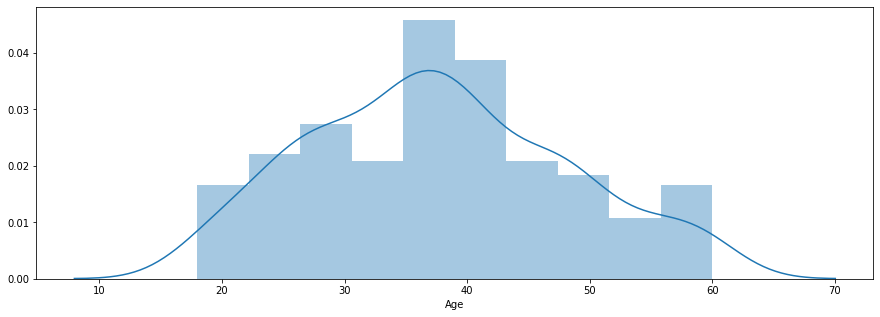

In [17]:
sns.distplot(tan['Age'])

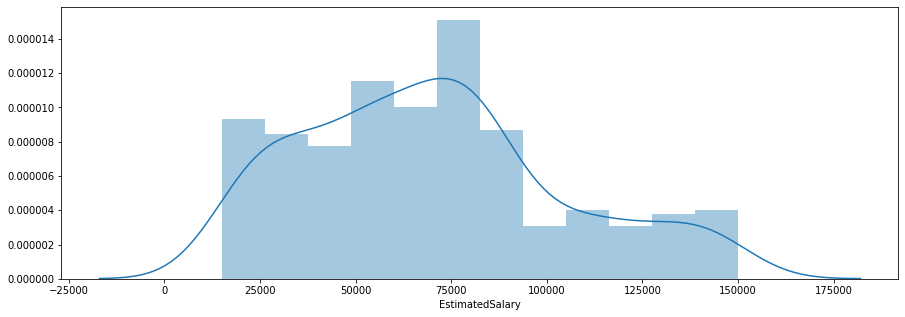

In [18]:
sns.distplot(tan['EstimatedSalary'])

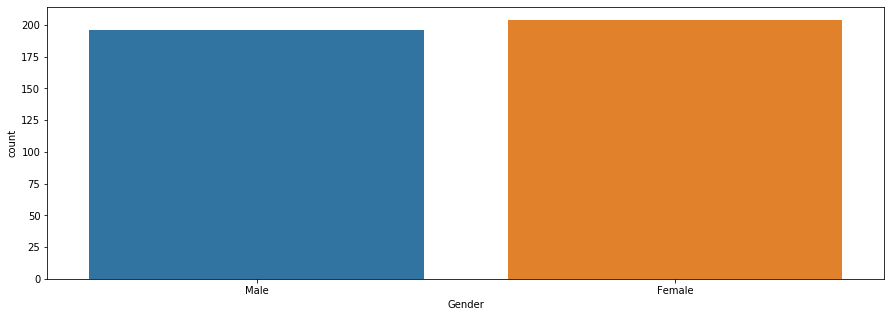

In [19]:
sns.countplot(x=tan['Gender'], data=tan)

it seems both male and female are equal in numbers

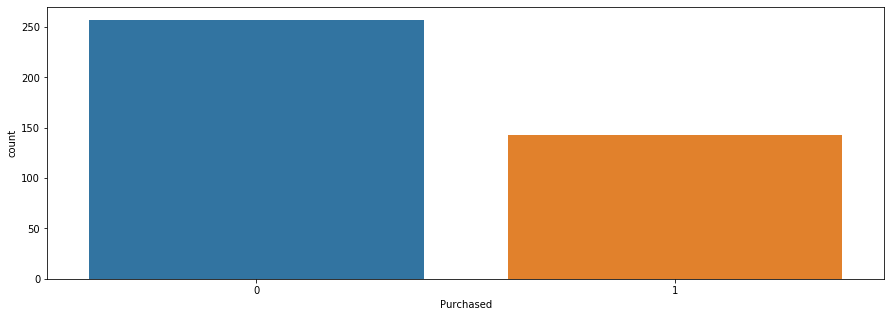

In [20]:
sns.countplot(x=tan['Purchased'], data=tan)

unpurchase rate is higher than purchase rate

In [21]:
numeric_columns

['Age', 'EstimatedSalary']

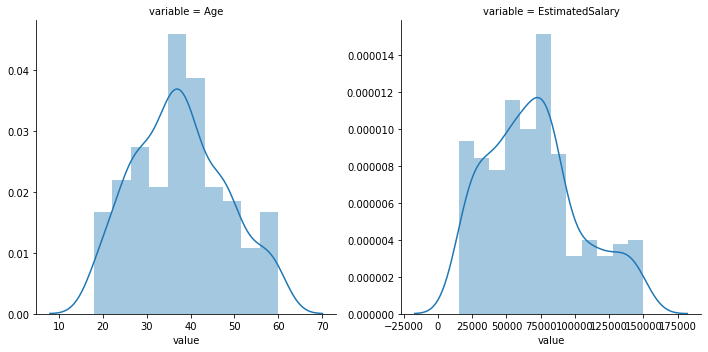

In [22]:
f = pd.melt(tan, value_vars=numeric_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height = 5)
g = g.map(sns.distplot, "value")


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


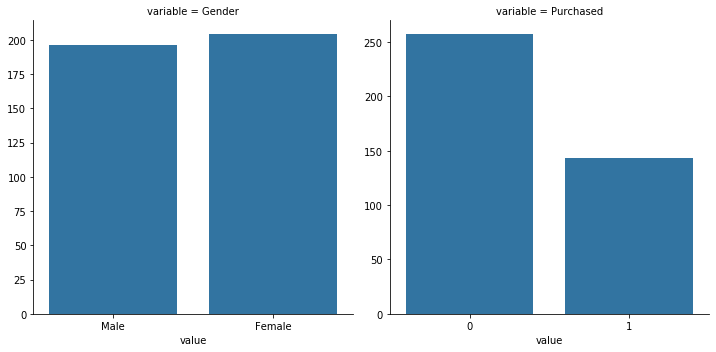

In [57]:
f = pd.melt(tan, value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.countplot, "value")

bivariate analysis

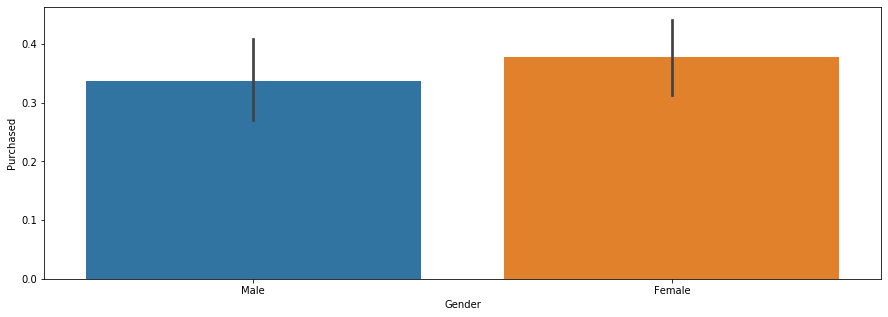

In [24]:
sns.barplot(x='Gender', y='Purchased', data=tan)

it shows female purchase little bit more than male

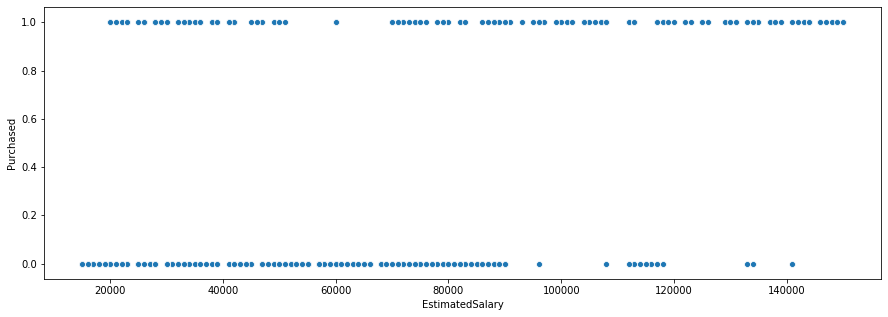

In [25]:
sns.scatterplot(x='EstimatedSalary', y='Purchased', data=tan)

it shows that people who do less purchase have the salary less than 90k

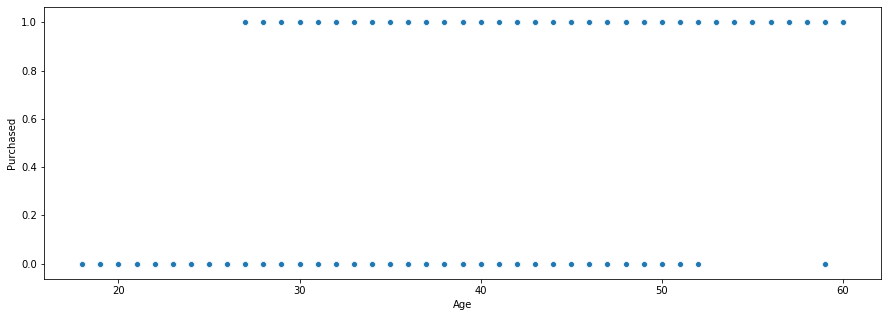

In [26]:
sns.scatterplot(x='Age', y='Purchased', data=tan)

people above 26 do purchase more often

Normalization

0.49502362888993623

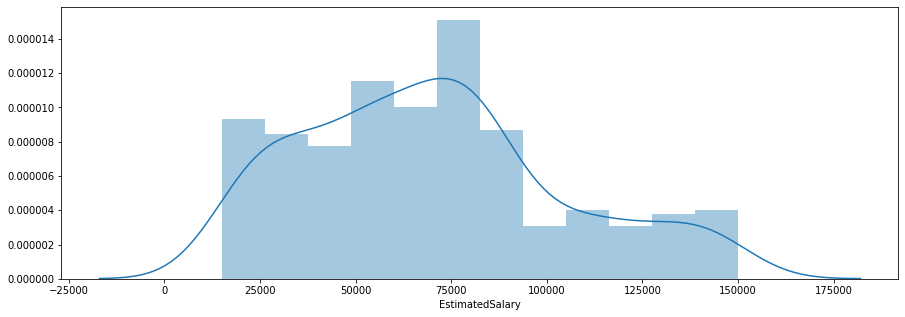

In [27]:
sns.distplot(tan['EstimatedSalary'])
tan['EstimatedSalary'].skew()

0.23133746309642822

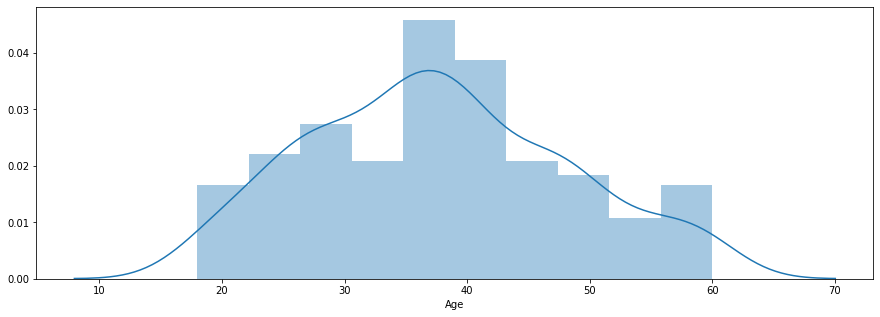

In [28]:
sns.distplot(tan['Age'])
tan['Age'].skew()

feature engineering

we need to convert gender to numeric 

one hot encoding

In [29]:

tan=pd.get_dummies(tan, columns=['Gender'])

In [30]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)


In [31]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
#sop Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [35]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [36]:
accuracy

0.85

In [37]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
accuracy = grid_search.best_score_


In [39]:
accuracy

0.91

In [40]:
grid_search.best_params_

{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}

In [41]:
classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [44]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [45]:
accuracy

0.93